# Import libraries

# import my custom funcitons  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import arviz as az

In [ ]:
import os
import sys
scr_dir = os.path.join(os.getcwd(),'..', 'scr')
sys.path.append(scr_dir)

from d03_modeling.NestedL00CV import f_NestedL00CV
from d04_metrics.PostiriorBalACC import f_betaAvPDF


In [ ]:
res = 0.001
x = np.arange(0,1, res)
betaParams = np.array([[31, 3], [9, 3], [4, 2]])
convPDF = f_betaAvPDF(x, betaParams)

In [ ]:
convPDF = np.real(convPDF)

convCDF = np.cumsum(convPDF) / np.sum(convPDF)


_, ax = plt.subplots(1,2)
ax[0].plot(x,convCDF)
ax[0].title.set_text('convCDF')

convCDF[convCDF < 0.025] = 0
convCDF[convCDF > 0.975] = 0

plt.plot(x,convCDF)
ax[0].title.set_text('convCDF 95%')




In [ ]:
#convPDF[convCDF < 0.025] = 0
#convPDF[convCDF > 0.975] = 0

plt.plot(x, convPDF)



In [ ]:

convPDF = np.real(convPDF)

_, ax2 = plt.subplots(1,3)

#PDF
ax2[0].plot(x, convPDF)
ax2[0].title.set_text('PDF')

#CDF
convCDF = np.cumsum(convPDF) / np.sum(convPDF)
#convCDF[convCDF < 0.025] = 0
#convCDF[convCDF > 0.975] = 0

ax2[1].plot(x,convCDF)
ax2[1].title.set_text('CDF')

#PDF
convPDF2 = np.insert(np.diff(convCDF), 0, convCDF[0])
ax2[2].plot(x,convPDF2)
ax2[2].title.set_text('PDF')




In [ ]:
mu = 20
sigma = 1
dataset2 = np.random.normal(mu, sigma, 10000)
#dataset2 = np.random.beta(10, 4, 100000)
az.plot_posterior(dataset2,hdi_prob = 0.95)


In [ ]:
import numpy as np
from scipy.stats import gaussian_kde, norm

sampled = np.random.normal(loc = 0, scale = 1, size = 1000)
kde = gaussian_kde(sampled, bw_method = 'silverman')
resampled = kde.resample(1000)


In [ ]:
import matplotlib.pyplot as plt
prev = 0.7
NP = 1000000
nI =  round(NP*prev)
nH = NP-nI

#--- generate the data ---
value_h = np.random.beta(2, 9, nH)
value_i = np.random.beta(5, 1, nI)
value_c = np.concatenate((value_h, value_i))

#--- analyse the data, compute the middle of the data classes (bins)---
nBins=30
count_c, bins_c, = np.histogram(value_c, bins=nBins)
myPDF = count_c/np.sum(count_c)

fig, ax = plt.subplots(1,2)
az.plot_posterior(value_h,hdi_prob = 0.95, ax=ax[0])
az.plot_posterior(value_i,hdi_prob = 0.95,ax=ax[1])


# Baysian A/B testing

(1000,)
(1000,)


C:\Users\My PC\Anaconda3\envs\TBI_PatientOutcomePred_Venv\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater


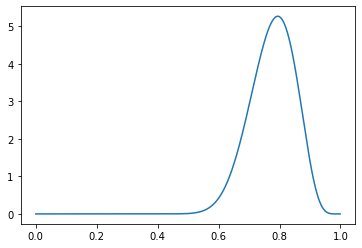

In [31]:
import numpy as np
import scipy.stats as st
import seaborn as sns
from scipy import interpolate 

betaParams = np.array([[31, 3], [9, 3], [4, 2]])
res = 0.001
x = np.arange(0,1, res)

convPDF = f_betaAvPDF(x, betaParams)
convPDF = np.real(convPDF)

plt.plot(x, convPDF)

mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])
    

betaParams = np.array([[31, 3], [9, 3], [4, 2]])
res = 0.001

def splineConv(betaParams, res):
    
    x = np.arange(0,1, res)

    convPDF = f_betaAvPDF(x, betaParams)
    convPDF = np.real(convPDF)
    
    t, c, k = interpolate.splrep(x, convPDF, s=0, k=4)
    spline = interpolate.BSpline(t, c, k, extrapolate=False)

    return spline




# Code adapted from https://agustinus.kristia.de/techblog/2015/10/17/metropolis-hastings/

def metropolis_hastings(p, iter=1000):
    x = 0.1
    samples = np.zeros((iter, 1))

    for i in range(iter):
        x_star = np.array([x]) + np.random.normal(size=1)
        if np.random.rand() < p(x_star) / p(x):
            x = x_star
        samples[i] = np.array([x])

    return samples



SampPDF = splineConv(betaParams, res)

samples = metropolis_hastings(SampPDF, iter=100000)
#sns.jointplot(samples[:, 0], samples[:, 1])

https://alpynepyano.github.io/healthyNumerics/posts/sampling_arbitrary_distributions_with_python.html

(0, 1)

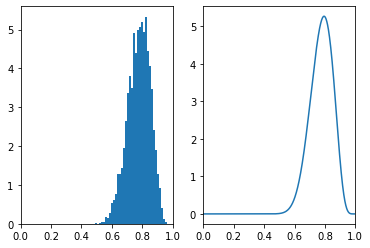

In [32]:
np.shape(samples)

_,ax = plt.subplots(1,2)



ax[0].hist(samples[:,0] , density=True,bins=75);
ax[0].set_xlim([0, 1])

ax[1].plot(x, convPDF)
ax[1].set_xlim([0, 1])



Text(0, 0.5, 'Density')

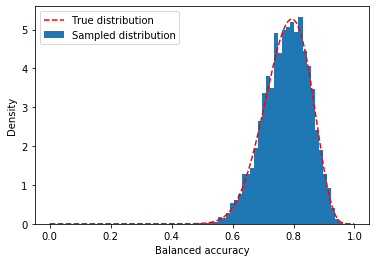

In [33]:
plt.hist(samples[:,0] , density=True,bins=75, label='Sampled distribution');
plt.plot(x, convPDF, '--r', label='True distribution')
plt.legend()
plt.xlabel('Balanced accuracy')
plt.ylabel('Density')

array(0.01044792)

In [ ]:
thetas = np.linspace(0, 1, 200)
prior = st.beta(a, b)

post = prior.pdf(thetas) * st.binom(n, thetas).pmf(h)
post /= (post.sum() / len(thetas))

plt.figure(figsize=(12, 9))
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, n*st.binom(n, thetas).pmf(h), label='Likelihood', c='green')
plt.plot(thetas, post, label='Posterior', c='red')
plt.xlim([0, 1])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

In [ ]:
prior.rvs(1)

In [ ]:
# plot CDF --- does what I coded below form me so just 
# code below calc HDI of a sampled distribution
# Turns out that arviz.plot_posterior function does this so use that!!


_, ax = plt.subplots(1,2)
plt_PDF = ax[0].hist(sampDiff, cumulative=False, density=True, bins=50) ;
plt_CDF = ax[1].hist(sampDiff, cumulative=True, density=True, bins=50);
plt.close()


x_CDF = plt_CDF[1][1:] 
y_CDF = plt_CDF[0]

mask = np.logical_or(y_CDF < 0.025, y_CDF > 0.9575)
y_CDF[mask] = 0

x_PDF = plt_PDF[1][1:]
y_PDF = plt_PDF[0]
y_PDF[mask] = 0



plt.plot(x_CDF, y_PDF)
#plt.fill(x_CDF, y_PDF, 'b', alpha=0.3) # plot the 95% HDI
plt.plot([0, 0], [0, 4], '--k')